In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import plotnine as gg
from plotnine import ggplot

In [22]:
participants = pd.read_csv('participants_preprocessed.csv')
participants['id'] = participants['id'].astype('category')

summary_con = participants.groupby(by='exp_condition').aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std),
    mean_acc = pd.NamedAgg('accuracy', np.mean)
)

summary_con.reset_index(inplace=True)
summary_con

,exp_condition,mean_RT,std_RT,mean_acc
0,match,0.549969,0.169761,0.968750
1,no_match,0.614898,0.340584,0.958333


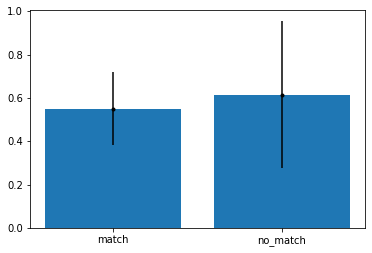

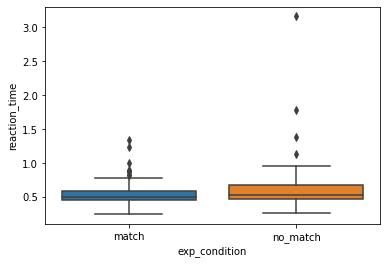

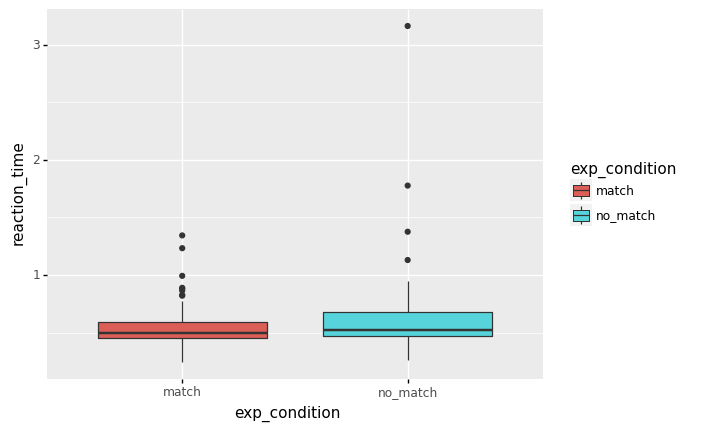

In [9]:
plt.figure()
plt.bar(summary_con['exp_condition'], summary_con['mean_RT'])
plt.errorbar(summary_con['exp_condition'], summary_con['mean_RT'], summary_con['std_RT'], fmt='k.')
plt.show()

sns.boxplot(x='exp_condition', y='reaction_time',data=participants)
plt.show()

plot = (
    ggplot(gg.aes(x='exp_condition', y='reaction_time'), data=participants) +
    gg.geom_boxplot(gg.aes(fill='exp_condition'))
)
plot.draw()
plt.show()

In [18]:
participants['accuracy'] = participants['accuracy'].astype('category')

summary_acc = participants.groupby(by='accuracy').aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std),
)

summary_acc.reset_index(inplace=True)
#summary_acc

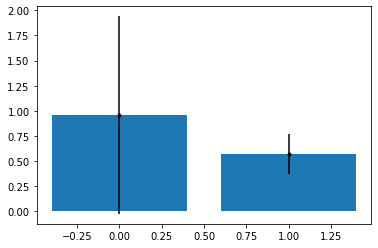

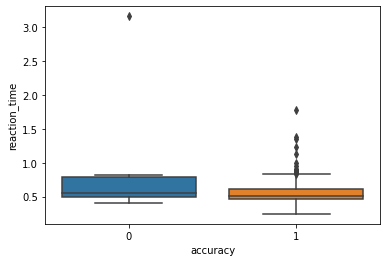

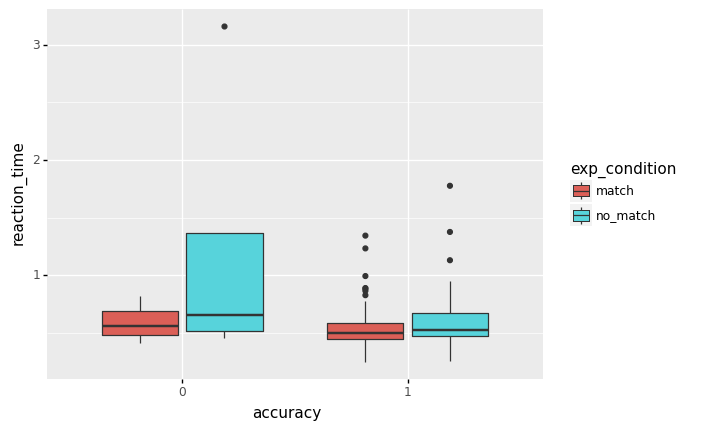

In [21]:
plt.figure()
plt.bar(summary_acc['accuracy'], summary_acc['mean_RT'])
plt.errorbar(summary_acc['accuracy'], summary_acc['mean_RT'], summary_acc['std_RT'], fmt='k.')
plt.show()

sns.boxplot(x='accuracy', y='reaction_time',data=participants)
plt.show()

plot = (
    ggplot(gg.aes(x='accuracy', y = 'reaction_time'), data=participants) +
    gg.geom_boxplot(gg.aes(fill='exp_condition'))
)
plot.draw()
plt.show()

In [25]:
summary_id = participants.groupby(by=['id', 'exp_condition']).aggregate(
    mean_RT = pd.NamedAgg('reaction_time', np.mean),
    std_RT = pd.NamedAgg('reaction_time', np.std),
    mean_acc = pd.NamedAgg('accuracy', np.mean)
)
summary_id.reset_index(inplace=True)
summary_id

,id,exp_condition,mean_RT,std_RT,mean_acc
0,1,match,0.551346,0.204821,0.958333
1,1,no_match,0.581438,0.143897,0.958333
2,2,match,0.493866,0.123671,1.000000
3,2,no_match,0.747591,0.565686,0.958333
4,3,match,0.603064,0.163474,0.916667
5,3,no_match,0.565371,0.188604,0.916667
6,4,match,0.551601,0.169803,1.000000
7,4,no_match,0.565192,0.279575,1.000000


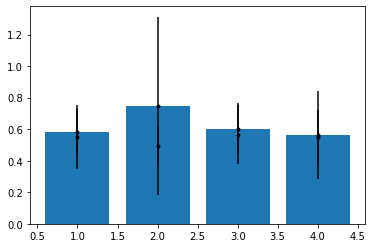

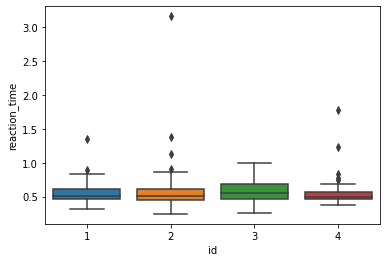

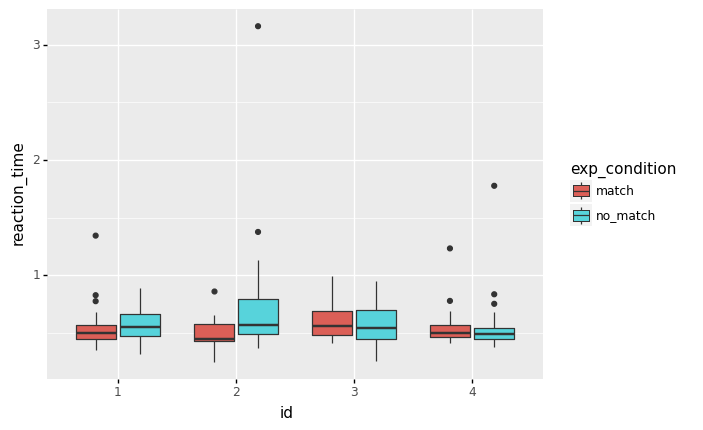

In [27]:
plt.figure()
plt.bar(summary_id['id'], summary_id['mean_RT'])
plt.errorbar(summary_id['id'], summary_id['mean_RT'], summary_id['std_RT'], fmt='k.')
plt.show()

sns.boxplot(x='id', y='reaction_time',data=participants)
plt.show()

plot = (
    ggplot(gg.aes(x='id', y = 'reaction_time'), data=participants) +
    gg.geom_boxplot(gg.aes(fill='exp_condition'))
)
plot.draw()
plt.show()